In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [30]:
product_data = pd.read_csv('amazon_products.csv')

In [31]:
product_data.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400


The correlation between both factors is 0.04


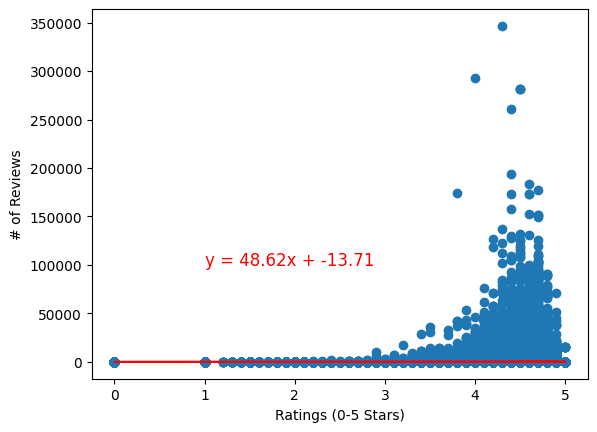

In [35]:
ratings = product_data["stars"]
reviews = product_data["reviews"]

correlation = st.pearsonr(ratings, reviews)
print(f"The correlation between both factors is {round(correlation[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(ratings, reviews)
regression_values = ratings * slope + intercept
lineEquation = f"y = {slope:.2f}x + {intercept:.2f}"

# for mouse weight and average observed tumor volume for the entire Capomulin regimen

plt.plot(ratings, regression_values,"r-")
plt.scatter(ratings, reviews)
plt.xlabel("Ratings (0-5 Stars)")
plt.ylabel("# of Reviews")
plt.annotate(lineEquation, (1, 100000), fontsize=12, color="red")
plt.show()




What if I omit products with 0 reviews?

The correlation between both factors is 0.05


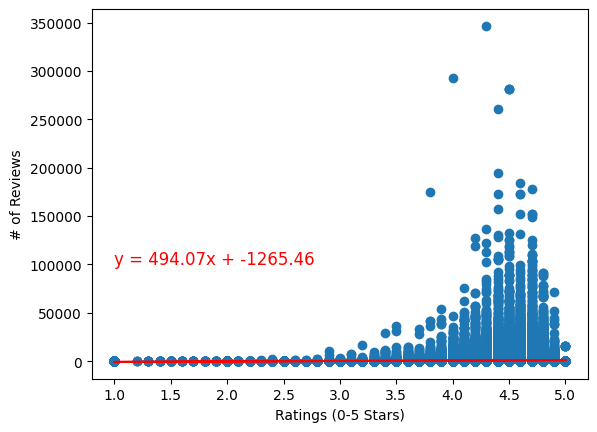

In [85]:
noZeroReviews = product_data.loc[product_data["reviews"] > 1]

noZeroReviews = noZeroReviews.reset_index()

noZeroratings = noZeroReviews["stars"]
noZeroreviews = noZeroReviews["reviews"]

correlation = st.pearsonr(noZeroratings, noZeroreviews)
print(f"The correlation between both factors is {round(correlation[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(noZeroratings, noZeroreviews)
regression_values = noZeroratings * slope + intercept
lineEquation = f"y = {slope:.2f}x + {intercept:.2f}"

# for mouse weight and average observed tumor volume for the entire Capomulin regimen

plt.plot(noZeroratings, regression_values, "r-")
plt.scatter(noZeroratings, noZeroreviews)
plt.xlabel("Ratings (0-5 Stars)")
plt.ylabel("# of Reviews")
plt.annotate(lineEquation, (1, 100000), fontsize=12, color="red")
plt.show()

Now to look at specific categories

In [86]:
category_data = pd.read_csv('amazon_categories.csv')
category_data = category_data.rename(columns={"id":"category_id"})
category_data.head()

,category_id,category_name
0,1,Beading & Jewelry Making
1,2,Fabric Decorating
2,3,Knitting & Crochet Supplies
3,4,Printmaking Supplies
4,5,Scrapbooking & Stamping Supplies


In [87]:
products_and_categories = pd.merge(product_data, category_data, on="category_id", how="left")
nozero_prodsandcats = pd.merge(noZeroReviews, category_data, on="category_id", how="left")

The correlation between both factors is 0.11


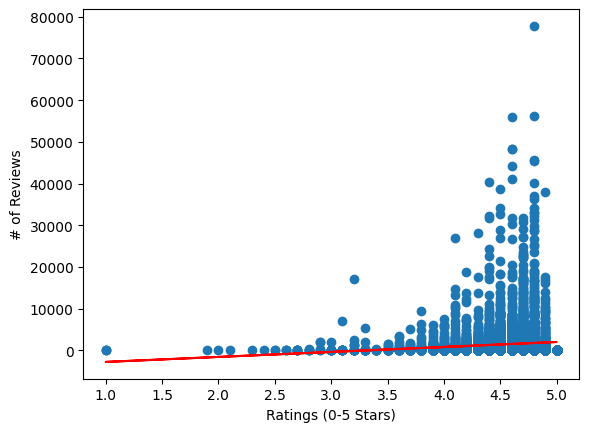

In [88]:
#Toys & Games

toys_and_games = nozero_prodsandcats.loc[nozero_prodsandcats["category_name"] == "Toys & Games"]

toyratings = toys_and_games["stars"]
toyreviews = toys_and_games["reviews"]

correlation = st.pearsonr(toyratings, toyreviews)
print(f"The correlation between both factors is {round(correlation[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(toyratings, toyreviews)
regression_values = toyratings * slope + intercept
lineEquation = f"y = {slope:.2f}x + {intercept:.2f}"

# for mouse weight and average observed tumor volume for the entire Capomulin regimen

plt.plot(toyratings, regression_values, "r-")
plt.scatter(toyratings, toyreviews)
plt.xlabel("Ratings (0-5 Stars)")
plt.ylabel("# of Reviews")
plt.annotate(lineEquation, (1, 100000), fontsize=12, color="red")
plt.show()


The correlation between both factors is 0.04


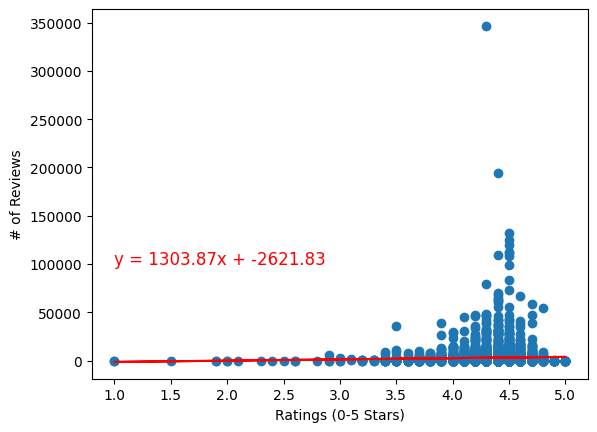

In [90]:
#Makeup

makeup = nozero_prodsandcats.loc[nozero_prodsandcats["category_name"] == "Makeup"]


makeupratings = makeup["stars"]
makeupreviews = makeup["reviews"]

correlation = st.pearsonr(makeupratings, makeupreviews)
print(f"The correlation between both factors is {round(correlation[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(makeupratings, makeupreviews)
regression_values = makeupratings * slope + intercept
lineEquation = f"y = {slope:.2f}x + {intercept:.2f}"

# for mouse weight and average observed tumor volume for the entire Capomulin regimen

plt.plot(makeupratings, regression_values, "r-")
plt.scatter(makeupratings, makeupreviews)
plt.xlabel("Ratings (0-5 Stars)")
plt.ylabel("# of Reviews")
plt.annotate(lineEquation, (1, 100000), fontsize=12, color="red")
plt.show()
